## Oil Contango and Backwardation

### Imports

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import functions as func

In [3]:
sns.set(style="whitegrid")

### Data set

In [13]:
dates = pd.date_range(start="2025-01-01", periods=12, freq='M')
spot_prices = np.linspace(70, 85, 12)  # Simulated spot prices
future_prices_backwardation = spot_prices - np.linspace(2, 10, 12)  # Futures lower than spot
future_prices_contango = spot_prices + np.linspace(2, 10, 12)  # Futures higher than spot
r = 0.05
# Time to maturity in years (assume 3-month futures = 0.25 years)
T_minus_t = 0.25

In [14]:
own_rate_backwardation = [func.oil_own_rate_log(spot_price, future_price, r, T_minus_t) for spot_price, future_price in zip(spot_prices, future_prices_backwardation)]
own_rate_contango = [func.oil_own_rate_log(spot_price, future_price, r, T_minus_t) for spot_price, future_price in zip(spot_prices, future_prices_contango)]

In [15]:
# Create DataFrame for plotting
df = pd.DataFrame({
    "Date": dates,
    "Spot Price": spot_prices,
    "Future Price (Backwardation)": future_prices_backwardation,
    "Future Price (Contango)": future_prices_contango,
    "Oil Own Rate (Backwardation)": own_rate_backwardation,
    "Oil Own Rate (Contango)": own_rate_contango
})


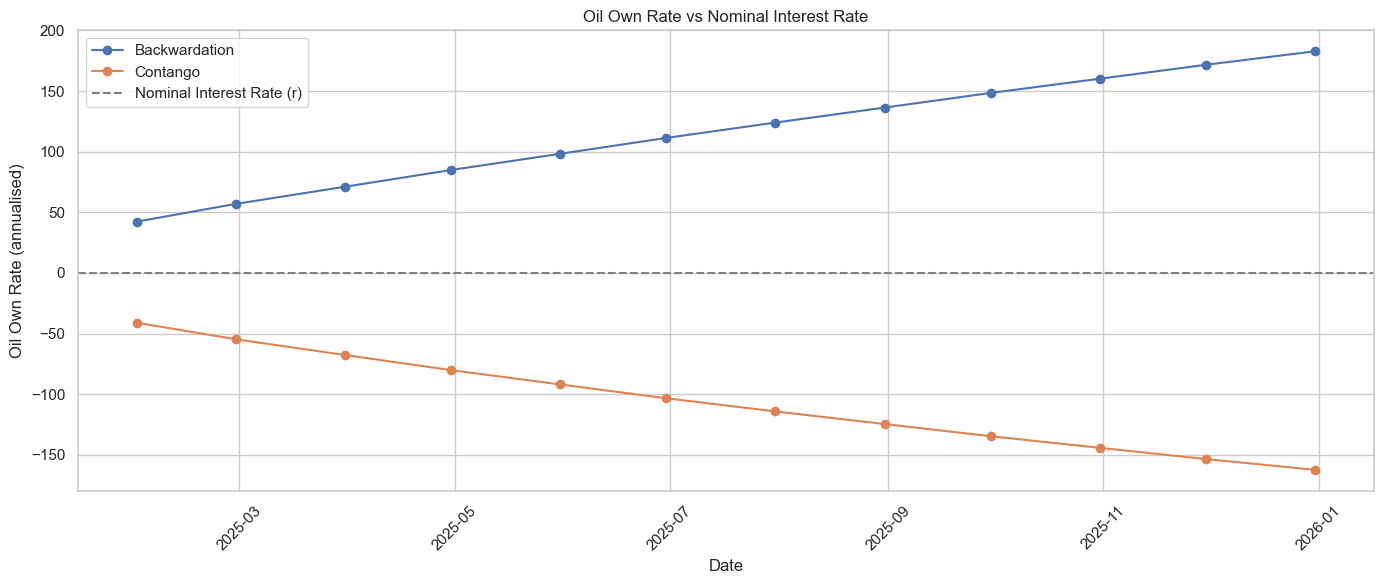

In [16]:
# Plotting
plt.figure(figsize=(14, 6))
plt.plot(df["Date"], df["Oil Own Rate (Backwardation)"], label="Backwardation", marker='o')
plt.plot(df["Date"], df["Oil Own Rate (Contango)"], label="Contango", marker='o')
plt.axhline(y=r, color='grey', linestyle='--', label="Nominal Interest Rate (r)")
plt.title("Oil Own Rate vs Nominal Interest Rate")
plt.ylabel("Oil Own Rate (annualised)")
plt.xlabel("Date")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()